# Gradient Descent on Carsmall Data having 5 features and 1 output

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing as p

# Dataset Looks like this: 

In [292]:
data=pd.read_csv('data_carsmall.csv')
feat_len=len(data.columns)-1
index_len=len(data.index)
data.head()

,x1,x2,x3,x4,x5,y
0,12.0,8,307,130,3504,18.0
1,11.5,8,350,165,3693,15.0
2,11.0,8,318,150,3436,18.0
3,12.0,8,304,150,3433,16.0
4,10.5,8,302,140,3449,17.0


In [293]:
X=np.ones([len(data.index),feat_len+1])

In [294]:
X[0:5]

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [295]:
for i in range(index_len):
    for j in range(feat_len):
         X[i][j+1]=data.iloc[i][data.columns[j]]

In [296]:
X[0:5,:]
print(X[0:5,0:6])

[[1.000e+00 1.200e+01 8.000e+00 3.070e+02 1.300e+02 3.504e+03]
 [1.000e+00 1.150e+01 8.000e+00 3.500e+02 1.650e+02 3.693e+03]
 [1.000e+00 1.100e+01 8.000e+00 3.180e+02 1.500e+02 3.436e+03]
 [1.000e+00 1.200e+01 8.000e+00 3.040e+02 1.500e+02 3.433e+03]
 [1.000e+00 1.050e+01 8.000e+00 3.020e+02 1.400e+02 3.449e+03]]


In [297]:
data.iloc[1]

x1      11.5
x2       8.0
x3     350.0
x4     165.0
x5    3693.0
y       15.0
Name: 1, dtype: float64

# Data Preprocessing

In [298]:
Y=data['y']
Y = np.expand_dims(Y, axis=0)
Y=Y.T
print(Y.shape)
Y[0:5]

(93, 1)


array([[18.],
       [15.],
       [18.],
       [16.],
       [17.]])

# Normalizing Data with Mean 0 and Variance 1

In [299]:
m_x=np.mean(X)
s_x=np.std(X)
m_y=np.mean(Y)
s_y=np.std(Y)
print(m_x, s_x, m_y, s_y)

X[:,1:6] = p.scale(X[:,1:6])
Y= p.scale(Y)

549.1609318996416 1131.1092291298783 23.725806451612904 8.035377465701439


# Data looks like this after normalization: 

In [300]:
X[0:5,:]

array([[ 1.        , -0.99504022,  1.41727109,  0.96195761,  0.4579008 ,
         0.67549877],
       [ 1.        , -1.15093433,  1.41727109,  1.35365585,  1.23378164,
         0.91127076],
       [ 1.        , -1.30682843,  1.41727109,  1.06215949,  0.90126128,
         0.59067075],
       [ 1.        , -0.99504022,  1.41727109,  0.93462982,  0.90126128,
         0.58692834],
       [ 1.        , -1.46272254,  1.41727109,  0.9164113 ,  0.67958104,
         0.60688787]])

In [301]:
Y[1:10]

array([[-1.08592365],
       [-0.71257467],
       [-0.96147399],
       [-0.83702433],
       [-1.08592365],
       [-1.21037331],
       [-1.21037331],
       [-1.21037331],
       [-1.08592365]])

In [302]:
print(np.mean(X))
print(np.std(X))
print(np.mean(Y))
print(np.std(Y))

0.16666666666666644
0.9860132971832691
-9.072790308764721e-17
1.0


# Data Dimensions


In [303]:
print(X.shape)
print(Y.shape)
m=5

(93, 6)
(93, 1)


# Gradient Descent Function: 

In [304]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
  
    past_costs = []
    theta_not=theta[-1] 
    past_thetas = [theta]
   
    for i in range(iterations):
          
        prediction = np.dot(x, theta) 
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs


# Taking Random Thetas initially and with 1 bias

In [305]:
theta=np.random.rand(6,1)/
theta

array([[0.11668534],
       [0.17822676],
       [0.43545971],
       [0.5250513 ],
       [0.34166554],
       [0.36007403]])

# Calling Gradient Descent with 1000 iterations and learning rate= 0.02

In [327]:
costs=[]
theta,costs=gradient_descent(X,Y,theta,1000,0.02)

In [328]:
theta=theta[-1]
theta.shape

(6, 1)

# Learned Parameters

In [329]:
#theta = np.expand_dims(theta, axis=0)
print(theta.shape)
cost_new=np.asarray(costs)
cost_new=cost_new[:,:,0]
theta

(6, 1)


array([[-2.33262644e-16],
       [-3.63945226e-02],
       [-5.08288193e-01],
       [ 3.19647034e-01],
       [-2.77685283e-01],
       [-4.67199579e-01]])

# Cost Function Looks Like this

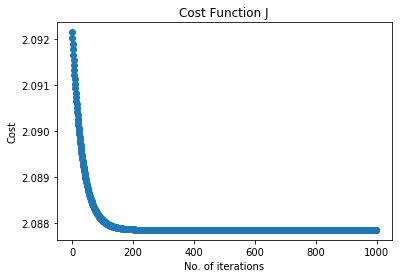

array([2.08784933])

In [341]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(cost_new,'o')
plt.show()
cost_new[-1]

# Testing the learned parameters

In [342]:
# Testing
data_test=pd.read_csv('data_carsmall_test.csv')

In [343]:
data_test

,X1,X2,X3,X4,X5,Y
0,17.5,4,133,115.0,3090,NaN
1,11.5,8,350,165.0,4142,NaN
2,11.0,8,351,153.0,4034,NaN
3,10.5,8,383,175.0,4166,NaN
4,11.0,8,360,175.0,3850,NaN
5,8.0,8,302,140.0,3353,NaN
6,20.5,4,151,NaN,3035,23.0


In [344]:
print(m_x, s_x, m_y, s_y)

549.1609318996416 1131.1092291298783 23.725806451612904 8.035377465701439


In [345]:
# Normalizing X vector first and then finding out Y

In [346]:
X_test=np.ones([6,6])
for i in range(6):
    for j in range(1,6):
        X_test[i][j]=((data_test.iloc[i][data_test.columns[j-1]])-m_x )/s_x
        

# Normalized X_test

In [347]:
X_test

array([[ 1.        , -0.470035  , -0.48197019, -0.36792285, -0.38383643,
         2.24632511],
       [ 1.        , -0.47533953, -0.47843384, -0.17607577, -0.33963204,
         3.1763856 ],
       [ 1.        , -0.47578158, -0.47843384, -0.17519169, -0.35024109,
         3.08090411],
       [ 1.        , -0.47622362, -0.47843384, -0.14690087, -0.33079116,
         3.19760371],
       [ 1.        , -0.47578158, -0.47843384, -0.16723489, -0.33079116,
         2.91823193],
       [ 1.        , -0.47843384, -0.47843384, -0.21851199, -0.36173424,
         2.47884024]])

In [348]:
print(X_test.shape)
print(theta.shape)

(6, 6)
(6, 1)


In [349]:
pred=np.dot(X_test,theta)
pred

array([[-0.79841541],
       [-1.18549527],
       [-1.13764169],
       [-1.1885055 ],
       [-1.06449892],
       [-0.86691691]])

# Denormalizing the output

In [350]:
pred=pred*s_y +m_y

In [351]:
pred

array([[17.31023726],
       [14.19990448],
       [14.58442603],
       [14.17571617],
       [15.17215585],
       [16.75980186]])